# Spend Analytics Capstone Project

##### In this project, we will analyse and classify spend data for the procurement function of a poultry company. This will enable the company to identify scope of efficiency improvement and better strategic planning.

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data

Data=pd.read_excel('SpendData.xlsx')

In [3]:
# Viewing first 5 rows of the dataset

Data.head()

,Purch.Doc.,Line Items,Changed On,Short Text,Material,CoCd,Plnt,SLoc,TrackingNo,Matl Group,PO Quantity,OUn,OPU,Conv.,Eq. To,Net Price,Per,Net Value,Gross value,GRT,Overdel. Tol.,Underdel.Tol.,DCI,Category Information,Cns,P.A.Item Information,Agr. Cum. Qty,TOZ,BUn,Non-deductible,Quantity,Price Date,Cat,Effective value,PTm,Net Weight,Un,Special Stock Information,Profit Ctr,Gross Weight,Volume,Net value,Statistical Information,Object no.,Time of Transmission,Next Transmission Number,Doc. Item Information,RShLi,MTyp,NCM Code,Spec. Stk Valuation,Reb.basis,Requested By,Itm,Requirement Urgency,CRM Item No,Down Payment Amount,Priority (Material Required Within),Ordered By,Approved By,Priority,Section,Indenter ID,Input Tax Credit,Item Information B.D.
0,1000007270,10,2018-03-24,Ring Die 1.2mm Pellet Mill MUZL1200Ø,968190.0,9000,9110,NaN,NaN,1310,1.0,EA,EA,1,1,4400.0,1,4400.0,4400.0,0,0,0,X,Q,P,0,0,0,EA,0.0,0,2018-03-24,F,0.0,0,0.0,NaN,Q,0000009110,0.0,0.0,0,NaN,0,00:00:00,1,0,0,YGEN,84369900,M,0.0,NaN,0,0,0,0,7,54745,54680,Medium,Maintenance,54745,T2,0
1,1000007270,20,2018-03-24,Ring Die 1.0mm Pellet Mill MUZL1200Ø,969020.0,9000,9110,NaN,NaN,1310,1.0,EA,EA,1,1,6100.0,1,6100.0,6100.0,0,0,0,X,Q,P,0,0,0,EA,0.0,0,2018-03-24,F,0.0,0,0.0,NaN,Q,0000009110,0.0,0.0,0,NaN,0,00:00:00,1,0,1,YGEN,84369900,M,0.0,NaN,0,0,0,0,7,54745,54680,Medium,Maintenance,54745,T2,0
2,1000007299,10,2018-09-29,Tata LPT 909/38/Cab,815810.0,9000,9110,NaN,NaN,ASSETS,11.0,EA,EA,1,1,823472.0,1,9058192.0,9058192.0,0,0,0,X,Q,P,0,0,0,EA,0.0,0,2018-05-07,F,0.0,0,0.0,KG,Q,0000009110,0.0,0.0,0,NaN,0,00:00:00,1,0,1,YCGM,8704,M,9058192.0,NaN,0,0,0,0,0,54651,54680,NaN,0,54651,T3,0
3,1000007299,20,2018-09-29,TCS @ 1% - Tata LPT 909/38/Cab,NaN,9000,9110,NaN,NaN,ASSETS,11.0,EA,EA,1,0,10540.0,1,115940.0,115940.0,0,0,0,X,P,V,0,0,0,NaN,0.0,0,2018-05-07,F,0.0,0,0.0,NaN,NaN,NaN,0.0,0.0,0,NaN,0,00:00:00,1,0,0,NaN,NaN,NaN,115940.0,NaN,0,0,0,0,0,0,0,NaN,0,0,T3,0
4,1000007299,30,2018-09-29,RTO - Tata LPT 909/38/Cab,NaN,9000,9110,NaN,NaN,ASSETS,11.0,EA,EA,1,0,10000.0,1,110000.0,110000.0,0,0,0,NaN,P,V,0,0,0,NaN,0.0,0,2018-05-07,F,0.0,0,0.0,NaN,NaN,NaN,0.0,0.0,0,NaN,0,00:00:00,1,0,0,NaN,NaN,NaN,110000.0,NaN,0,0,0,0,0,0,0,NaN,0,0,T3,0


In [4]:
# Checking size of the data

Data.shape

(151412, 65)

In [5]:
# Looking at data types for variables in the dataset

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151412 entries, 0 to 151411
Data columns (total 65 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   Purch.Doc.                           151412 non-null  int64         
 1   Line Items                           151412 non-null  int64         
 2   Changed On                           151412 non-null  datetime64[ns]
 3   Short Text                           151412 non-null  object        
 4   Material                             148321 non-null  float64       
 5   CoCd                                 151412 non-null  int64         
 6   Plnt                                 151412 non-null  object        
 7   SLoc                                 119236 non-null  object        
 8   TrackingNo                           9205 non-null    object        
 9   Matl Group                           151412 non-null  object        
 

In [6]:
# Checking column/variable names in the dataset

Data.columns

Index(['Purch.Doc.', 'Line Items', 'Changed On', 'Short Text', 'Material',
       'CoCd', 'Plnt', 'SLoc', 'TrackingNo', 'Matl Group', 'PO Quantity',
       'OUn', 'OPU', 'Conv.', 'Eq. To', 'Net Price', 'Per', 'Net Value',
       'Gross value', 'GRT', 'Overdel. Tol.', 'Underdel.Tol.', 'DCI',
       'Category Information', 'Cns', 'P.A.Item Information', 'Agr. Cum. Qty',
       'TOZ', 'BUn', 'Non-deductible', 'Quantity', 'Price Date', 'Cat',
       'Effective value', 'PTm', 'Net Weight', 'Un',
       'Special Stock Information', 'Profit Ctr', 'Gross Weight', 'Volume',
       'Net value', 'Statistical Information', 'Object no.',
       'Time of Transmission', 'Next Transmission Number',
       'Doc. Item Information', 'RShLi', 'MTyp', 'NCM Code',
       'Spec. Stk Valuation', 'Reb.basis', 'Requested By', 'Itm',
       'Requirement Urgency', 'CRM  Item No', 'Down Payment Amount',
       'Priority (Material Required Within)', 'Ordered By', 'Approved By',
       'Priority', 'Section', 'Indent

In [7]:
# Extracting 2 date columns

df2 = Data[['Changed On', 'Price Date']]

In [8]:
# Dropping columns that may not be important [checked using feature importance techniques and business logic]

df=Data.drop(['SLoc', 'TrackingNo','OUn','OPU','Conv.','Eq. To','Per','GRT','DCI','Cns',
              'P.A.Item Information','Agr. Cum. Qty','BUn','TOZ',
              'Non-deductible','Quantity','Cat','Effective value','Category Information',
'PTm','Net Weight','Un','Special Stock Information','Profit Ctr','Statistical Information',
              'Gross Weight','Volume','Object no.','Time of Transmission','Next Transmission Number',
'Doc. Item Information','RShLi','MTyp','NCM Code','Spec. Stk Valuation','Requested By',
              'Itm','Requirement Urgency','Net value',
'CRM  Item No','Down Payment Amount','Ordered By','Approved By','Priority',
              'Indenter ID','Input Tax Credit','Section','Item Information B.D.','Changed On','Price Date'] ,axis=1)

In [9]:
# Size of dataset after dropping significant number of columns
df.shape

(151412, 15)

In [10]:
# Viewing first 5 rows of the dataset after dropping columns
df.head()

,Purch.Doc.,Line Items,Short Text,Material,CoCd,Plnt,Matl Group,PO Quantity,Net Price,Net Value,Gross value,Overdel. Tol.,Underdel.Tol.,Reb.basis,Priority (Material Required Within)
0,1000007270,10,Ring Die 1.2mm Pellet Mill MUZL1200Ø,968190.0,9000,9110,1310,1.0,4400.0,4400.0,4400.0,0,0,0.0,7
1,1000007270,20,Ring Die 1.0mm Pellet Mill MUZL1200Ø,969020.0,9000,9110,1310,1.0,6100.0,6100.0,6100.0,0,0,0.0,7
2,1000007299,10,Tata LPT 909/38/Cab,815810.0,9000,9110,ASSETS,11.0,823472.0,9058192.0,9058192.0,0,0,9058192.0,0
3,1000007299,20,TCS @ 1% - Tata LPT 909/38/Cab,NaN,9000,9110,ASSETS,11.0,10540.0,115940.0,115940.0,0,0,115940.0,0
4,1000007299,30,RTO - Tata LPT 909/38/Cab,NaN,9000,9110,ASSETS,11.0,10000.0,110000.0,110000.0,0,0,110000.0,0


In [11]:
# New data after dropping variables
# Saving as pre-processed data to csv

df.to_csv("Pre-processed data.csv")

In [12]:
# Importing new data after dropping variables

new = pd.read_csv('Pre-processed data.csv')

In [13]:
# Viewing first 5 rows of the dataset 

new.head()

,Unnamed: 0,Purch.Doc.,Line Items,Short Text,Material,CoCd,Plnt,Matl Group,PO Quantity,Net Price,Net Value,Gross value,Overdel. Tol.,Underdel.Tol.,Reb.basis,Priority (Material Required Within)
0,0,1000007270,10,Ring Die 1.2mm Pellet Mill MUZL1200Ø,968190.0,9000,9110,1310,1.0,4400.0,4400.0,4400.0,0,0,0.0,7
1,1,1000007270,20,Ring Die 1.0mm Pellet Mill MUZL1200Ø,969020.0,9000,9110,1310,1.0,6100.0,6100.0,6100.0,0,0,0.0,7
2,2,1000007299,10,Tata LPT 909/38/Cab,815810.0,9000,9110,ASSETS,11.0,823472.0,9058192.0,9058192.0,0,0,9058192.0,0
3,3,1000007299,20,TCS @ 1% - Tata LPT 909/38/Cab,NaN,9000,9110,ASSETS,11.0,10540.0,115940.0,115940.0,0,0,115940.0,0
4,4,1000007299,30,RTO - Tata LPT 909/38/Cab,NaN,9000,9110,ASSETS,11.0,10000.0,110000.0,110000.0,0,0,110000.0,0


In [14]:
# Viewing column names of the new dataset

new.columns

Index(['Unnamed: 0', 'Purch.Doc.', 'Line Items', 'Short Text', 'Material',
       'CoCd', 'Plnt', 'Matl Group', 'PO Quantity', 'Net Price', 'Net Value',
       'Gross value', 'Overdel. Tol.', 'Underdel.Tol.', 'Reb.basis',
       'Priority (Material Required Within)'],
      dtype='object')

In [15]:
# Dropping superfluous column

new.drop('Unnamed: 0',axis=1,inplace=True)

In [16]:
# Viewing first 5 rows of the dataset after dropping column

new.head()

,Purch.Doc.,Line Items,Short Text,Material,CoCd,Plnt,Matl Group,PO Quantity,Net Price,Net Value,Gross value,Overdel. Tol.,Underdel.Tol.,Reb.basis,Priority (Material Required Within)
0,1000007270,10,Ring Die 1.2mm Pellet Mill MUZL1200Ø,968190.0,9000,9110,1310,1.0,4400.0,4400.0,4400.0,0,0,0.0,7
1,1000007270,20,Ring Die 1.0mm Pellet Mill MUZL1200Ø,969020.0,9000,9110,1310,1.0,6100.0,6100.0,6100.0,0,0,0.0,7
2,1000007299,10,Tata LPT 909/38/Cab,815810.0,9000,9110,ASSETS,11.0,823472.0,9058192.0,9058192.0,0,0,9058192.0,0
3,1000007299,20,TCS @ 1% - Tata LPT 909/38/Cab,NaN,9000,9110,ASSETS,11.0,10540.0,115940.0,115940.0,0,0,115940.0,0
4,1000007299,30,RTO - Tata LPT 909/38/Cab,NaN,9000,9110,ASSETS,11.0,10000.0,110000.0,110000.0,0,0,110000.0,0


In [17]:
# Casting categorical variables with numbers to object data type
# This will ensure that they are not included in any analysis relevant for numerical variables like checking distribution etc.

new['Purch.Doc.']=new['Purch.Doc.'].astype('object')
new['Line Items']=new['Line Items'].astype('object')
new['Material']=new['Material'].astype('object')
new['CoCd']=new['CoCd'].astype('object')
new['Plnt']=new['Plnt'].astype('object')

In [18]:
# Checking data types of the new dataset

new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151412 entries, 0 to 151411
Data columns (total 15 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Purch.Doc.                           151412 non-null  object 
 1   Line Items                           151412 non-null  object 
 2   Short Text                           151412 non-null  object 
 3   Material                             148321 non-null  object 
 4   CoCd                                 151412 non-null  object 
 5   Plnt                                 151412 non-null  object 
 6   Matl Group                           151412 non-null  object 
 7   PO Quantity                          151412 non-null  float64
 8   Net Price                            151412 non-null  float64
 9   Net Value                            151412 non-null  float64
 10  Gross value                          151412 non-null  float64
 11  Overdel. Tol.

In [19]:
# Checking size of the new dataset

new.shape

(151412, 15)

##### Identifying null values and imputing using median for numerical variables and modal value for categorical variables

In [20]:
# Finding null values

new.isnull().sum()

Purch.Doc.                                0
Line Items                                0
Short Text                                0
Material                               3091
CoCd                                      0
Plnt                                      0
Matl Group                                0
PO Quantity                               0
Net Price                                 0
Net Value                                 0
Gross value                               0
Overdel. Tol.                             0
Underdel.Tol.                             0
Reb.basis                                 0
Priority (Material Required Within)       0
dtype: int64

In [21]:
# Viewing total null values across the dataset

new.isnull().sum().sum()

3091

In [22]:
# Extracting categorical data
#categorical_variable=[feature for feature in Data.columns if 
                  #Data[feature].dtypes != 'float']
    
categorical_data = new.select_dtypes(exclude=[np.number])

In [23]:
# Extracting numerical data

numeric_data = new.select_dtypes(include=[np.number])

In [24]:
# Viewing sizes of the extracted categorical and numerical datasets

print(numeric_data.shape)
print(categorical_data.shape)

(151412, 8)
(151412, 7)


In [28]:
# Importing simple imputer function from the sci-kit learn library

from sklearn.impute import SimpleImputer

In [29]:
# Imputing numerical variables [COMMENTING TEMPORARILY - DECIDE WHETHER TO DELETE OR KEEP CODE]

simple_imputer=SimpleImputer(strategy='median')
numerical_missing=pd.DataFrame(simple_imputer.fit_transform(new.select_dtypes(exclude='O')))

In [30]:
numerical_missing.columns=numeric_data.select_dtypes(exclude='object').columns

In [31]:
# Imputing categorical variables 

cat_imputation=SimpleImputer(strategy='most_frequent')
categorical_missing=pd.DataFrame(cat_imputation.fit_transform(new.select_dtypes(exclude='number')))

In [32]:
categorical_missing.columns=categorical_data.select_dtypes(exclude='number').columns

In [33]:
categorical_missing.head()

,Purch.Doc.,Line Items,Short Text,Material,CoCd,Plnt,Matl Group
0,1000007270,10,Ring Die 1.2mm Pellet Mill MUZL1200Ø,968190.0,9000,9110,1310
1,1000007270,20,Ring Die 1.0mm Pellet Mill MUZL1200Ø,969020.0,9000,9110,1310
2,1000007299,10,Tata LPT 909/38/Cab,815810.0,9000,9110,ASSETS
3,1000007299,20,TCS @ 1% - Tata LPT 909/38/Cab,7101320.0,9000,9110,ASSETS
4,1000007299,30,RTO - Tata LPT 909/38/Cab,7101320.0,9000,9110,ASSETS


In [34]:
numerical_missing.head()

,PO Quantity,Net Price,Net Value,Gross value,Overdel. Tol.,Underdel.Tol.,Reb.basis,Priority (Material Required Within)
0,1.0,4400.0,4400.0,4400.0,0.0,0.0,0.0,7.0
1,1.0,6100.0,6100.0,6100.0,0.0,0.0,0.0,7.0
2,11.0,823472.0,9058192.0,9058192.0,0.0,0.0,9058192.0,0.0
3,11.0,10540.0,115940.0,115940.0,0.0,0.0,115940.0,0.0
4,11.0,10000.0,110000.0,110000.0,0.0,0.0,110000.0,0.0


In [35]:
# Concatenating numerical and categorical variables

new_data = pd.concat([numerical_missing,categorical_missing],axis=1)

In [36]:
new_data.head()

,PO Quantity,Net Price,Net Value,Gross value,Overdel. Tol.,Underdel.Tol.,Reb.basis,Priority (Material Required Within),Purch.Doc.,Line Items,Short Text,Material,CoCd,Plnt,Matl Group
0,1.0,4400.0,4400.0,4400.0,0.0,0.0,0.0,7.0,1000007270,10,Ring Die 1.2mm Pellet Mill MUZL1200Ø,968190.0,9000,9110,1310
1,1.0,6100.0,6100.0,6100.0,0.0,0.0,0.0,7.0,1000007270,20,Ring Die 1.0mm Pellet Mill MUZL1200Ø,969020.0,9000,9110,1310
2,11.0,823472.0,9058192.0,9058192.0,0.0,0.0,9058192.0,0.0,1000007299,10,Tata LPT 909/38/Cab,815810.0,9000,9110,ASSETS
3,11.0,10540.0,115940.0,115940.0,0.0,0.0,115940.0,0.0,1000007299,20,TCS @ 1% - Tata LPT 909/38/Cab,7101320.0,9000,9110,ASSETS
4,11.0,10000.0,110000.0,110000.0,0.0,0.0,110000.0,0.0,1000007299,30,RTO - Tata LPT 909/38/Cab,7101320.0,9000,9110,ASSETS


In [37]:
new_data.shape

(151412, 15)

In [38]:
new_data.isnull().sum()

PO Quantity                            0
Net Price                              0
Net Value                              0
Gross value                            0
Overdel. Tol.                          0
Underdel.Tol.                          0
Reb.basis                              0
Priority (Material Required Within)    0
Purch.Doc.                             0
Line Items                             0
Short Text                             0
Material                               0
CoCd                                   0
Plnt                                   0
Matl Group                             0
dtype: int64

In [39]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151412 entries, 0 to 151411
Data columns (total 15 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   PO Quantity                          151412 non-null  float64
 1   Net Price                            151412 non-null  float64
 2   Net Value                            151412 non-null  float64
 3   Gross value                          151412 non-null  float64
 4   Overdel. Tol.                        151412 non-null  float64
 5   Underdel.Tol.                        151412 non-null  float64
 6   Reb.basis                            151412 non-null  float64
 7   Priority (Material Required Within)  151412 non-null  float64
 8   Purch.Doc.                           151412 non-null  object 
 9   Line Items                           151412 non-null  object 
 10  Short Text                           151412 non-null  object 
 11  Material     

In [40]:
new_data.isnull().sum().sum()

0

##### Outlier detection, visualisation and handling using interquartile range (IQR), box plots and capping

In [41]:
sorted(numerical_missing)

['Gross value',
 'Net Price',
 'Net Value',
 'Overdel. Tol.',
 'PO Quantity',
 'Priority (Material Required Within)',
 'Reb.basis',
 'Underdel.Tol.']

In [42]:
q1, q3= np.percentile(numerical_missing,[25,75])

In [43]:
iqr = q3 - q1

In [44]:
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 

In [45]:
lower_bound

-13425.273749999998

In [46]:
upper_bound

22375.456249999996

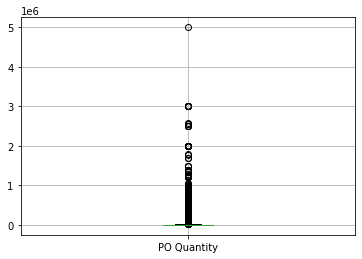

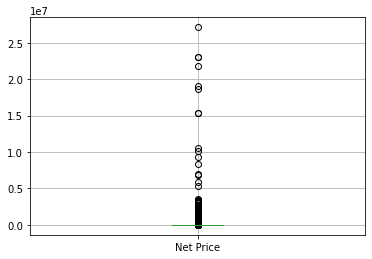

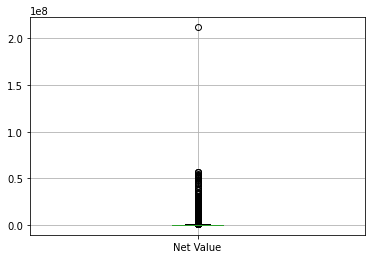

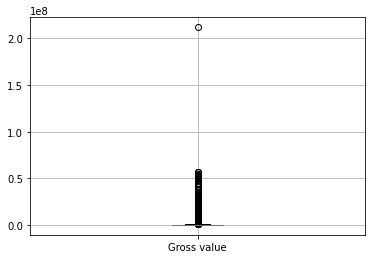

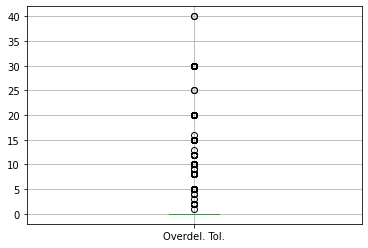

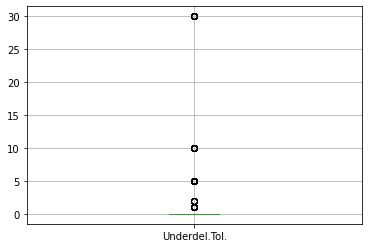

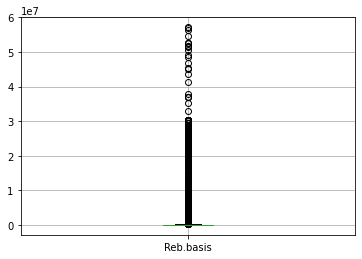

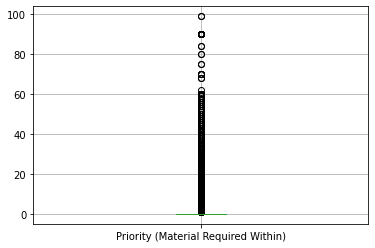

In [47]:
# Creating box plots to view outliers

for column in numerical_missing:
    plt.figure()
    numerical_missing.boxplot([column])
    plt.show()

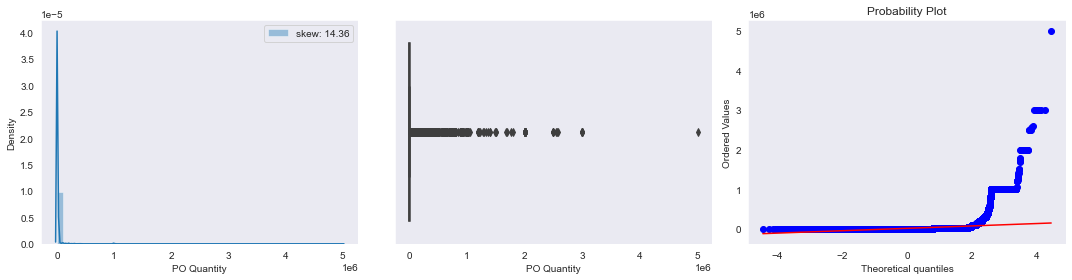

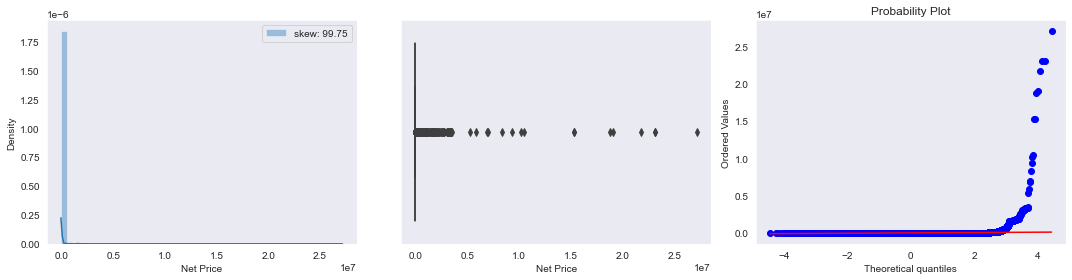

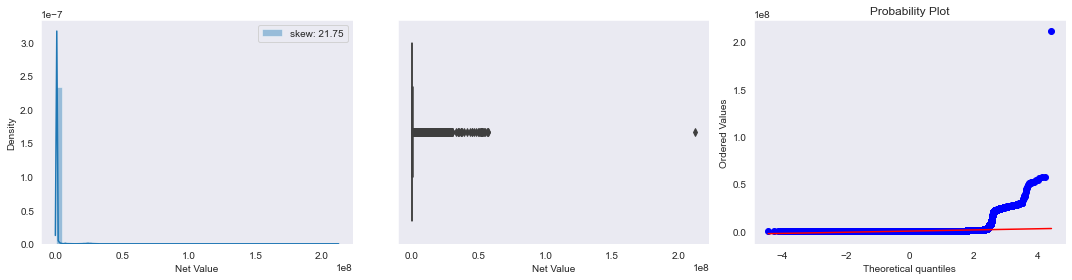

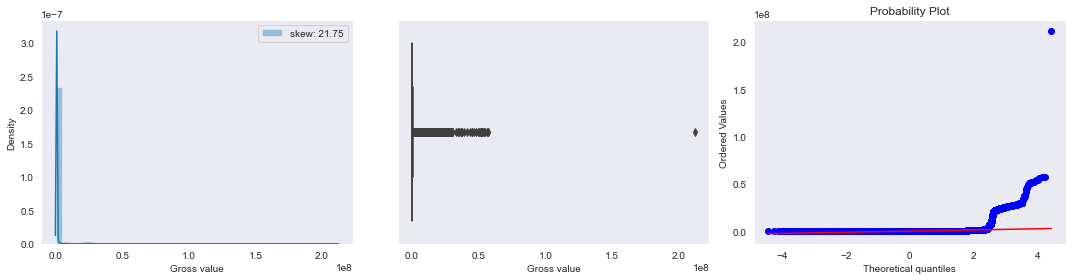

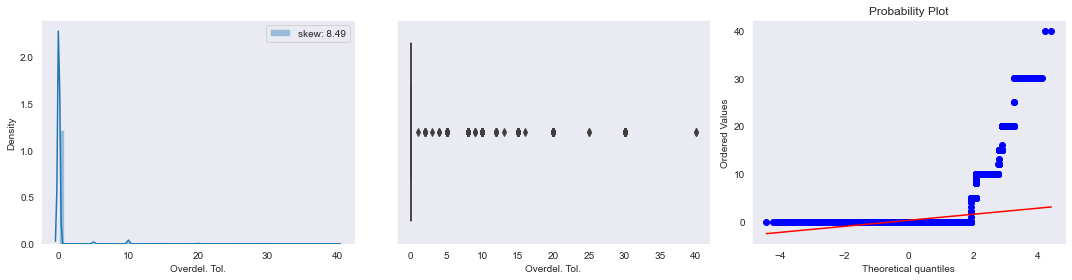

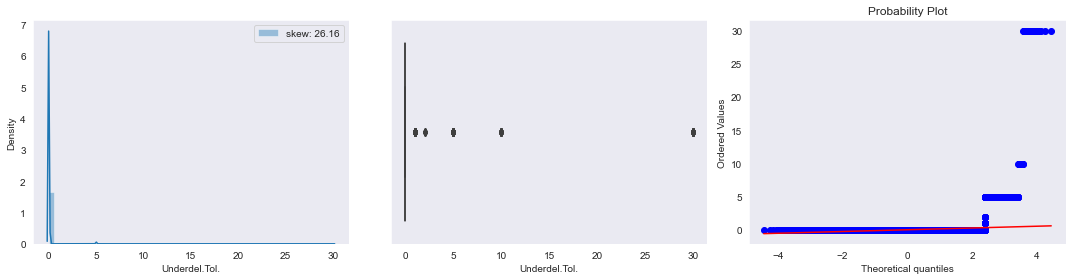

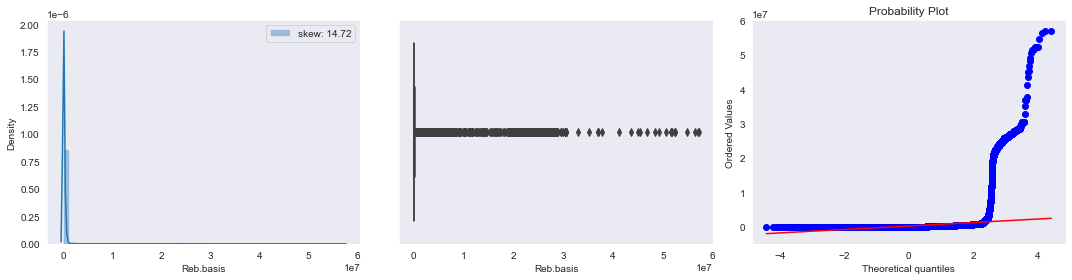

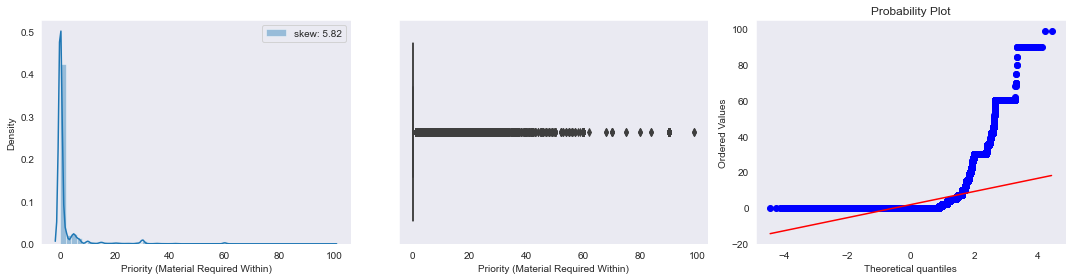

In [48]:
# Visualisation of outliers

import scipy.stats as stats
sns.set_style('dark')
for col in numerical_missing:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(numerical_missing[col], label="skew: " + str(np.round(numerical_missing[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(numerical_missing[col])
    plt.subplot(133)
    stats.probplot(numerical_missing[col], plot=plt)
    plt.tight_layout()
    plt.show()    

In [49]:
# Making copy of the dataset with numerical columns

df_cap = numerical_missing.copy()

In [50]:
# Creating function for iqr capping

def iqr_capping(numerical_missing, cols, factor):
    
    for col in numerical_missing:
        
        q1 = numerical_missing[col].quantile(0.25)
        q3 = numerical_missing[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        numerical_missing[col] = np.where(numerical_missing[col]>upper_whisker, upper_whisker,
                 np.where(numerical_missing[col]<lower_whisker, lower_whisker, numerical_missing[col]))

In [51]:
iqr_capping(df_cap, numerical_missing, 1.5)

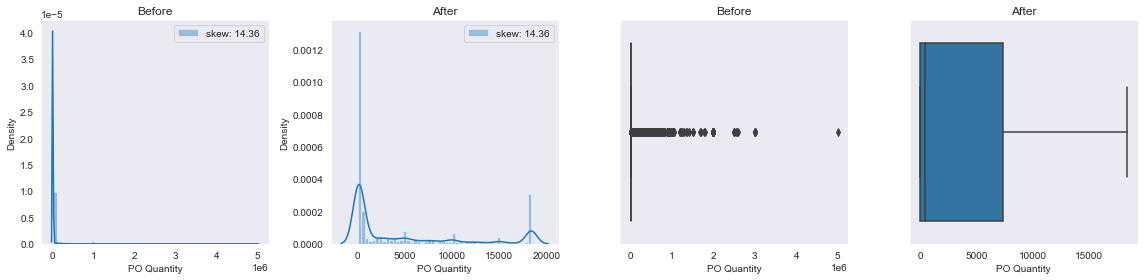

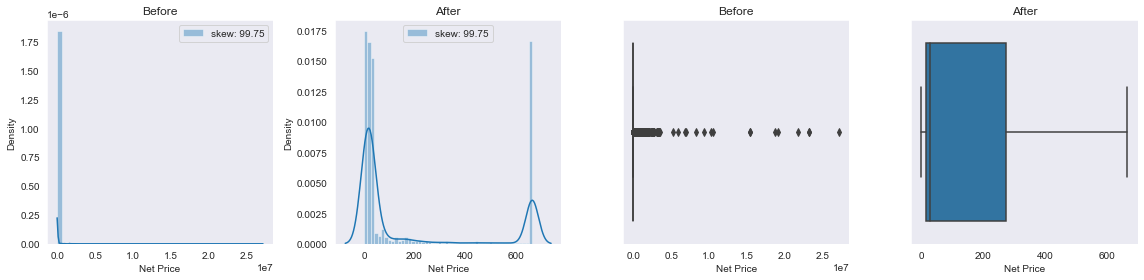

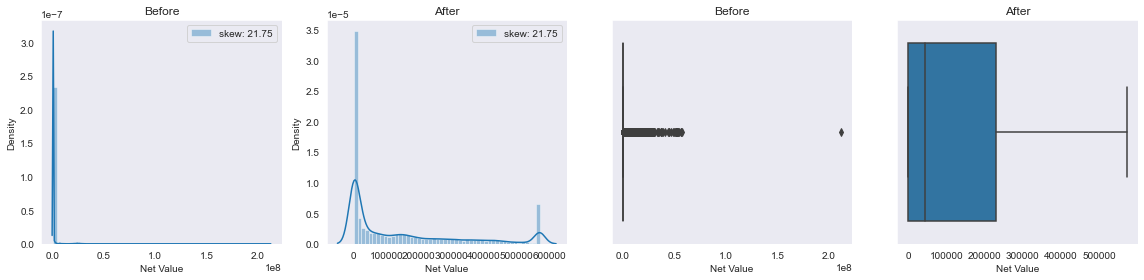

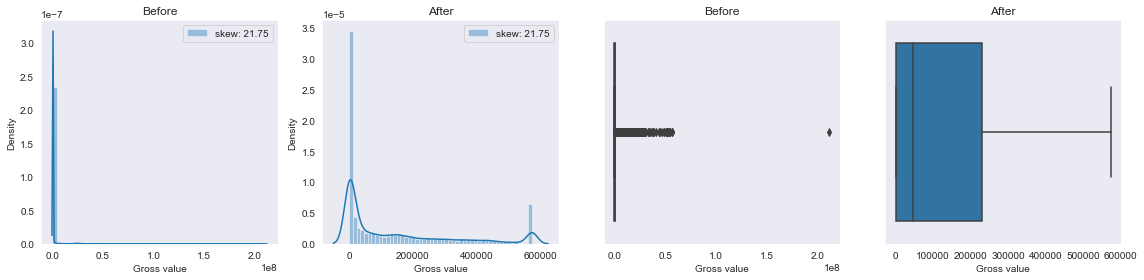

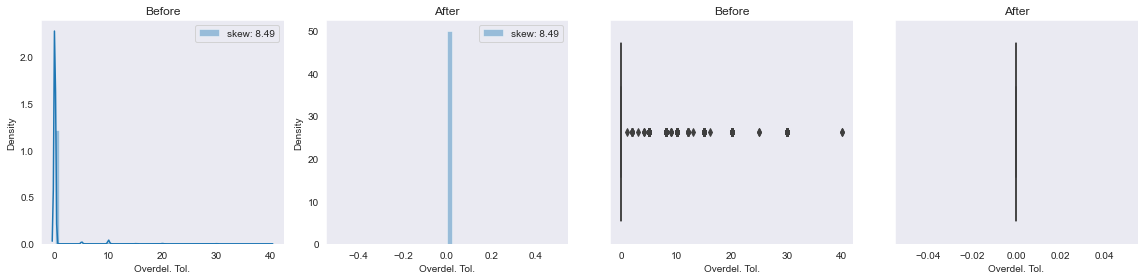

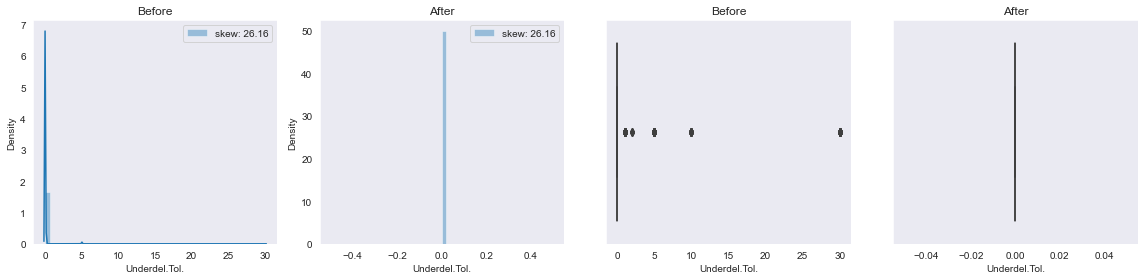

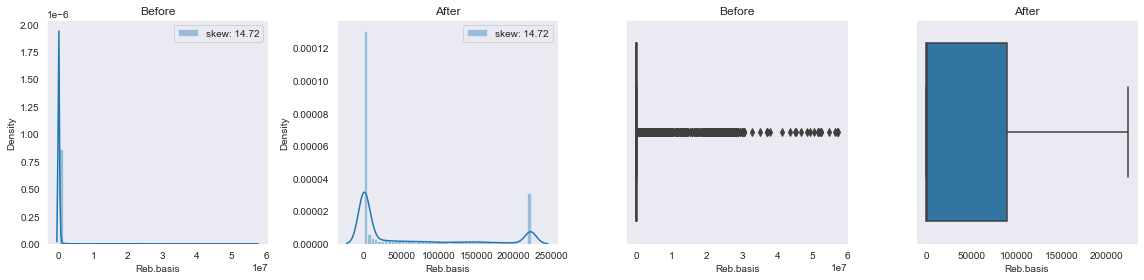

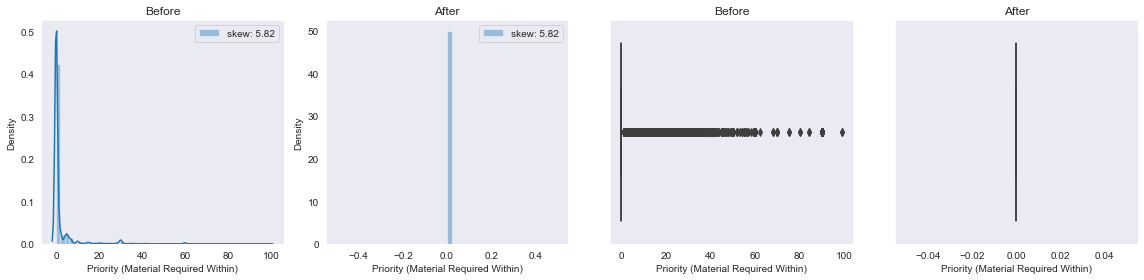

In [52]:
# Visualisation before and after outliers

for col in numerical_missing:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(numerical_missing[col], label="skew: " + str(np.round(numerical_missing[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_cap[col], label="skew: " + str(np.round(numerical_missing[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(numerical_missing[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_cap[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()

In [53]:
# New dataset before and after missing values and outliers

new_data.to_csv('new_data2.csv')

In [54]:
# Concatenating numerical and categorical

new_data3=pd.concat([df_cap,categorical_missing],axis=1)

In [55]:
new_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151412 entries, 0 to 151411
Data columns (total 15 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   PO Quantity                          151412 non-null  float64
 1   Net Price                            151412 non-null  float64
 2   Net Value                            151412 non-null  float64
 3   Gross value                          151412 non-null  float64
 4   Overdel. Tol.                        151412 non-null  float64
 5   Underdel.Tol.                        151412 non-null  float64
 6   Reb.basis                            151412 non-null  float64
 7   Priority (Material Required Within)  151412 non-null  float64
 8   Purch.Doc.                           151412 non-null  object 
 9   Line Items                           151412 non-null  object 
 10  Short Text                           151412 non-null  object 
 11  Material     

In [56]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151412 entries, 0 to 151411
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Changed On  151412 non-null  datetime64[ns]
 1   Price Date  150852 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 2.3 MB


In [57]:
df2.isnull().sum()

Changed On      0
Price Date    560
dtype: int64

In [58]:
new_data4=pd.concat([new_data3,df2],axis=1)

In [59]:
new_data4 = new_data4[new_data4['Price Date'].notna()]

In [60]:
new_data4.isnull().sum().sum()

0

In [61]:
new_data4.shape

(150852, 17)

In [62]:
new_data4['Price_Day']=(new_data4['Price Date'] ).dt.day
new_data4['Price_month']=(new_data4['Price Date']).dt.month
new_data4['Price_year']=(new_data4['Price Date']).dt.year


In [63]:
new_data4.head()

,PO Quantity,Net Price,Net Value,Gross value,Overdel. Tol.,Underdel.Tol.,Reb.basis,Priority (Material Required Within),Purch.Doc.,Line Items,Short Text,Material,CoCd,Plnt,Matl Group,Changed On,Price Date,Price_Day,Price_month,Price_year
0,1.0,665.195,4400.000,4400.00000,0.0,0.0,0.0,0.0,1000007270,10,Ring Die 1.2mm Pellet Mill MUZL1200Ø,968190.0,9000,9110,1310,2018-03-24,2018-03-24,24,3,2018
1,1.0,665.195,6100.000,6100.00000,0.0,0.0,0.0,0.0,1000007270,20,Ring Die 1.0mm Pellet Mill MUZL1200Ø,969020.0,9000,9110,1310,2018-03-24,2018-03-24,24,3,2018
2,11.0,665.195,571389.225,573783.59375,0.0,0.0,222750.0,0.0,1000007299,10,Tata LPT 909/38/Cab,815810.0,9000,9110,ASSETS,2018-09-29,2018-05-07,7,5,2018
3,11.0,665.195,115940.000,115940.00000,0.0,0.0,115940.0,0.0,1000007299,20,TCS @ 1% - Tata LPT 909/38/Cab,7101320.0,9000,9110,ASSETS,2018-09-29,2018-05-07,7,5,2018
4,11.0,665.195,110000.000,110000.00000,0.0,0.0,110000.0,0.0,1000007299,30,RTO - Tata LPT 909/38/Cab,7101320.0,9000,9110,ASSETS,2018-09-29,2018-05-07,7,5,2018


In [64]:
# Extracting day, month, year from changed on date variable

new_data4['change_day']=(new_data4['Changed On'] ).dt.day
new_data4['change_month']=(new_data4['Changed On']).dt.month
new_data4['change_year']=(new_data4['Changed On']).dt.year

In [65]:
new_data4.head()

,PO Quantity,Net Price,Net Value,Gross value,Overdel. Tol.,Underdel.Tol.,Reb.basis,Priority (Material Required Within),Purch.Doc.,Line Items,Short Text,Material,CoCd,Plnt,Matl Group,Changed On,Price Date,Price_Day,Price_month,Price_year,change_day,change_month,change_year
0,1.0,665.195,4400.000,4400.00000,0.0,0.0,0.0,0.0,1000007270,10,Ring Die 1.2mm Pellet Mill MUZL1200Ø,968190.0,9000,9110,1310,2018-03-24,2018-03-24,24,3,2018,24,3,2018
1,1.0,665.195,6100.000,6100.00000,0.0,0.0,0.0,0.0,1000007270,20,Ring Die 1.0mm Pellet Mill MUZL1200Ø,969020.0,9000,9110,1310,2018-03-24,2018-03-24,24,3,2018,24,3,2018
2,11.0,665.195,571389.225,573783.59375,0.0,0.0,222750.0,0.0,1000007299,10,Tata LPT 909/38/Cab,815810.0,9000,9110,ASSETS,2018-09-29,2018-05-07,7,5,2018,29,9,2018
3,11.0,665.195,115940.000,115940.00000,0.0,0.0,115940.0,0.0,1000007299,20,TCS @ 1% - Tata LPT 909/38/Cab,7101320.0,9000,9110,ASSETS,2018-09-29,2018-05-07,7,5,2018,29,9,2018
4,11.0,665.195,110000.000,110000.00000,0.0,0.0,110000.0,0.0,1000007299,30,RTO - Tata LPT 909/38/Cab,7101320.0,9000,9110,ASSETS,2018-09-29,2018-05-07,7,5,2018,29,9,2018


In [66]:
new_data4.to_csv("new_data3.csv")

In [67]:
data6=pd.read_csv('new_data3.csv')

In [68]:
data6.drop('Unnamed: 0',axis=1,inplace=True)

In [69]:
data6.columns

Index(['PO Quantity', 'Net Price', 'Net Value', 'Gross value', 'Overdel. Tol.',
       'Underdel.Tol.', 'Reb.basis', 'Priority (Material Required Within)',
       'Purch.Doc.', 'Line Items', 'Short Text', 'Material', 'CoCd', 'Plnt',
       'Matl Group', 'Changed On', 'Price Date', 'Price_Day', 'Price_month',
       'Price_year', 'change_day', 'change_month', 'change_year'],
      dtype='object')

In [70]:
data6.shape

(150852, 23)

In [71]:
data6.isnull().sum().sum()

0

In [72]:
# Total unique values for short text
n = len(pd.unique(data6['Short Text']))

In [73]:
print(n)# 12362 total unique values

12362


In [74]:
n = len(pd.unique(data6['CoCd']))

In [75]:
print(n)

5


In [76]:
n = len(pd.unique(data6['Plnt']))

In [77]:
print(n)

136


# Feature Engineering

In [78]:
df3=data6.drop(['change_day','change_month','change_year','Price_Day','Price_month','Price_year','Reb.basis','Priority (Material Required Within)'],axis=1)

In [79]:
df3.head()

,PO Quantity,Net Price,Net Value,Gross value,Overdel. Tol.,Underdel.Tol.,Purch.Doc.,Line Items,Short Text,Material,CoCd,Plnt,Matl Group,Changed On,Price Date
0,1.0,665.195,4400.000,4400.00000,0.0,0.0,1000007270,10,Ring Die 1.2mm Pellet Mill MUZL1200Ø,968190.0,9000,9110,1310,2018-03-24,2018-03-24
1,1.0,665.195,6100.000,6100.00000,0.0,0.0,1000007270,20,Ring Die 1.0mm Pellet Mill MUZL1200Ø,969020.0,9000,9110,1310,2018-03-24,2018-03-24
2,11.0,665.195,571389.225,573783.59375,0.0,0.0,1000007299,10,Tata LPT 909/38/Cab,815810.0,9000,9110,ASSETS,2018-09-29,2018-05-07
3,11.0,665.195,115940.000,115940.00000,0.0,0.0,1000007299,20,TCS @ 1% - Tata LPT 909/38/Cab,7101320.0,9000,9110,ASSETS,2018-09-29,2018-05-07
4,11.0,665.195,110000.000,110000.00000,0.0,0.0,1000007299,30,RTO - Tata LPT 909/38/Cab,7101320.0,9000,9110,ASSETS,2018-09-29,2018-05-07


##### Checking for duplicates

In [80]:
duplicateDFRow = df3[df3.duplicated()]
print(duplicateDFRow)

Empty DataFrame
Columns: [PO Quantity, Net Price, Net Value, Gross value, Overdel. Tol., Underdel.Tol., Purch.Doc., Line Items, Short Text, Material, CoCd, Plnt, Matl Group, Changed On, Price Date]
Index: []


In [81]:
print(df3.duplicated().sum())

0


In [82]:
df3.nunique()

PO Quantity      18128
Net Price         6215
Net Value        60568
Gross value      59137
Overdel. Tol.        1
Underdel.Tol.        1
Purch.Doc.       84366
Line Items          58
Short Text       12362
Material          3546
CoCd                 5
Plnt               136
Matl Group         153
Changed On         321
Price Date         368
dtype: int64

##### Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. ML algorithms can then decidehow those labe ls must be worked on.

In [83]:
from sklearn import preprocessing   
from sklearn.preprocessing import LabelEncoder

In [84]:
LabelEncoder1=LabelEncoder()
df3['CoCd']=LabelEncoder1.fit_transform(df3['CoCd'])
df3['Plnt']=LabelEncoder1.fit_transform(df3['Plnt'])
df3['Short Text']=LabelEncoder1.fit_transform(df3['Short Text'])
df3['Matl Group']=LabelEncoder1.fit_transform(df3['Matl Group'])

In [85]:
df3.head()

,PO Quantity,Net Price,Net Value,Gross value,Overdel. Tol.,Underdel.Tol.,Purch.Doc.,Line Items,Short Text,Material,CoCd,Plnt,Matl Group,Changed On,Price Date
0,1.0,665.195,4400.000,4400.00000,0.0,0.0,1000007270,10,9926,968190.0,4,65,40,2018-03-24,2018-03-24
1,1.0,665.195,6100.000,6100.00000,0.0,0.0,1000007270,20,9925,969020.0,4,65,40,2018-03-24,2018-03-24
2,11.0,665.195,571389.225,573783.59375,0.0,0.0,1000007299,10,11235,815810.0,4,65,146,2018-09-29,2018-05-07
3,11.0,665.195,115940.000,115940.00000,0.0,0.0,1000007299,20,11130,7101320.0,4,65,146,2018-09-29,2018-05-07
4,11.0,665.195,110000.000,110000.00000,0.0,0.0,1000007299,30,9452,7101320.0,4,65,146,2018-09-29,2018-05-07


In [86]:
df3.shape

(150852, 15)

In [87]:
df3.columns

Index(['PO Quantity', 'Net Price', 'Net Value', 'Gross value', 'Overdel. Tol.',
       'Underdel.Tol.', 'Purch.Doc.', 'Line Items', 'Short Text', 'Material',
       'CoCd', 'Plnt', 'Matl Group', 'Changed On', 'Price Date'],
      dtype='object')

In [88]:
df4 = df3[['PO Quantity', 'Net Price', 'Net Value', 'Gross value', 'Purch.Doc.', 'Line Items', 'Short Text', 'Material',
       'CoCd', 'Plnt', 'Matl Group', 'Changed On', 'Price Date']]

In [89]:
df4 = df3.drop(columns=['Overdel. Tol.','Underdel.Tol.'])

In [90]:
df4.columns

Index(['PO Quantity', 'Net Price', 'Net Value', 'Gross value', 'Purch.Doc.',
       'Line Items', 'Short Text', 'Material', 'CoCd', 'Plnt', 'Matl Group',
       'Changed On', 'Price Date'],
      dtype='object')

In [91]:
df5 = df4.drop(columns=['Changed On', 'Price Date'])

In [92]:
df5.columns

Index(['PO Quantity', 'Net Price', 'Net Value', 'Gross value', 'Purch.Doc.',
       'Line Items', 'Short Text', 'Material', 'CoCd', 'Plnt', 'Matl Group'],
      dtype='object')

In [93]:
df5=pd.DataFrame(df5)

In [94]:
df5.head()

,PO Quantity,Net Price,Net Value,Gross value,Purch.Doc.,Line Items,Short Text,Material,CoCd,Plnt,Matl Group
0,1.0,665.195,4400.000,4400.00000,1000007270,10,9926,968190.0,4,65,40
1,1.0,665.195,6100.000,6100.00000,1000007270,20,9925,969020.0,4,65,40
2,11.0,665.195,571389.225,573783.59375,1000007299,10,11235,815810.0,4,65,146
3,11.0,665.195,115940.000,115940.00000,1000007299,20,11130,7101320.0,4,65,146
4,11.0,665.195,110000.000,110000.00000,1000007299,30,9452,7101320.0,4,65,146


##### Feature scaling is a method used to normalize the range of independent variables or features of data.

In [95]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

df5 = scaler.fit_transform(df5)
#print(df_scaled)
normalized_df = pd.DataFrame(df5,columns=['unmaed','PO Quantity','Net Price','Net Value','Gross value','Purch.Doc.','Line Items','Short Text','CoCd','Plnt','Matl Group'])

In [96]:
normalized_df.head()

,unmaed,PO Quantity,Net Price,Net Value,Gross value,Purch.Doc.,Line Items,Short Text,CoCd,Plnt,Matl Group
0,-0.692449,1.791165,-0.747415,-0.748399,-5.230107,-0.374054,1.214855,-0.772696,0.820172,-0.599051,-0.964188
1,-0.692449,1.791165,-0.738083,-0.739091,-5.230107,0.053025,1.214448,-0.772424,0.820172,-0.599051,-0.964188
2,-0.690895,1.791165,2.365157,2.369307,-5.230107,-0.374054,1.747380,-0.822761,0.820172,-0.599051,2.725280
3,-0.690895,1.791165,-0.135100,-0.137653,-5.230107,0.053025,1.704664,1.242358,0.820172,-0.599051,2.725280
4,-0.690895,1.791165,-0.167708,-0.170178,-5.230107,0.480104,1.022023,1.242358,0.820172,-0.599051,2.725280


In [97]:
normalized_df.drop('unmaed',axis=1,inplace=True)

In [98]:
normalized_df.head()

,PO Quantity,Net Price,Net Value,Gross value,Purch.Doc.,Line Items,Short Text,CoCd,Plnt,Matl Group
0,1.791165,-0.747415,-0.748399,-5.230107,-0.374054,1.214855,-0.772696,0.820172,-0.599051,-0.964188
1,1.791165,-0.738083,-0.739091,-5.230107,0.053025,1.214448,-0.772424,0.820172,-0.599051,-0.964188
2,1.791165,2.365157,2.369307,-5.230107,-0.374054,1.747380,-0.822761,0.820172,-0.599051,2.725280
3,1.791165,-0.135100,-0.137653,-5.230107,0.053025,1.704664,1.242358,0.820172,-0.599051,2.725280
4,1.791165,-0.167708,-0.170178,-5.230107,0.480104,1.022023,1.242358,0.820172,-0.599051,2.725280


In [99]:
from sklearn.decomposition import PCA

In [100]:
pca = PCA(n_components=10) 
X_principal = pca.fit_transform(normalized_df) 
X_principal1 = pd.DataFrame(X_principal,columns=['PO Quantity','Net Price','Net Value','Gross value','Purch.Doc.','Line Items','Short Text','CoCd','Plnt','Matl Group'])
#X_principal1.columns=[['PO Quantity','Net Value']]

In [101]:
#score_pca=pca.transform(X_principal1)

In [102]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_samples, silhouette_score

##### Elbow Method for K-Means clustering is an empirical method to find the optimal number of clusters for a dataset. In this method, we pick a range of candidate values of k, then apply K-Means clustering using each of the values of k. Find the average distance of each point in a cluster to its centroid, and represent it in a plot. Pick the value of k, where the average distance falls suddenly.

In [103]:
!pip install yellowbrick

In [104]:
sdf=X_principal1.sample(n=20000,random_state=10)

In [105]:
sdf.head()

,PO Quantity,Net Price,Net Value,Gross value,Purch.Doc.,Line Items,Short Text,CoCd,Plnt,Matl Group
117894,-1.143568,1.464141,-0.894340,0.383867,-0.247054,-0.242160,-0.085240,0.017897,-0.117308,-0.000363
88103,-1.073449,1.435632,-1.145145,0.276737,-0.134171,0.027245,0.118674,0.014965,-0.007874,-0.000013
24417,2.029273,0.217072,0.337582,-0.913388,0.005715,-0.665598,2.447002,-1.108256,0.208126,-0.005058
103926,-1.460672,1.281345,-0.172686,0.570976,-0.256346,-0.356424,0.649101,0.042764,-0.082469,-0.003313
96414,2.241565,-0.197394,-0.549233,-0.510466,0.459867,0.178586,0.041033,-0.077972,0.025443,0.000057


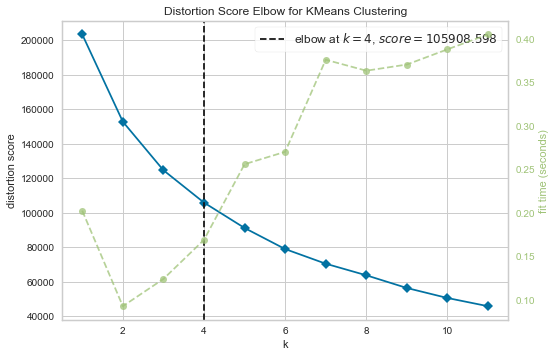

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [106]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(sdf)
visualizer.show()
# the optimal number of clusters (k) is plotted against the distortion 
# (total of within-cluster sum of squares for a given number of k). The optimal number of k is a point where 
# there is a bend in the curve (elbow or knee). 
# Based on the elbow method, the optimal number of clusters (k) is 4

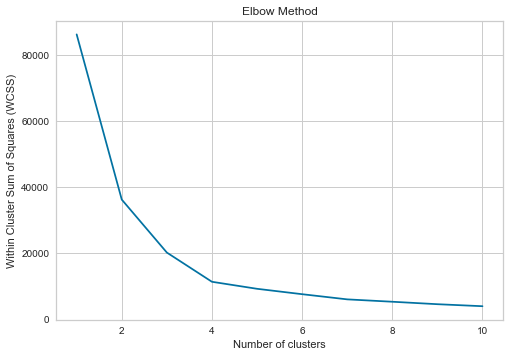

In [107]:
X = np.array(sdf.loc[:,['PO Quantity',                # Choose your variable names
                       'Net Value']])    \
                        .reshape(-1, 2)

# Determine optimal cluster number with elbow method
wcss = []

for i in range(1, 11):
    model = KMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    #max_iter = 300,                     # Maximum number of iterations 
                    #n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(X)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()

In [108]:
#from kneed import KneeLocator
#kl = KneeLocator(
#      range(1, 10), inertia, curve="convex", direction="decreasing"
#   )

In [109]:
#kl.knee

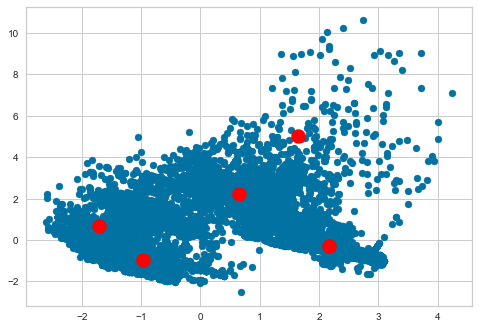

In [110]:
kmeans = KMeans(n_clusters = 5,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                                  # Choose how often algorithm will run with different centroid
                random_state = 10)               # Choose random state for reproducibility

pred_y = kmeans.fit_predict(X)


# Plot the data
plt.scatter(X[:,0], 
            X[:,1])

# Plot the clusters 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=200,                             # Set centroid size
            c='red')                           # Set centroid color
plt.show()

In [111]:
kmeans.labels_ 

array([0, 0, 1, ..., 4, 2, 1])

In [112]:
from collections import Counter
Counter(kmeans.labels_)
Counter({2: 50, 0: 50, 3: 50, 1: 50})

Counter({2: 50, 0: 50, 3: 50, 1: 50})

In [113]:
kmeans.inertia_

9301.386631452846

In [114]:
#import seaborn as sns
#import matplotlib.pyplot as plt
#sns.scatterplot(data=X_principal, x="PO Quantity", y="Gross value", hue=kmeans_model.labels_)
#plt.show()

In [115]:
kmeans

KMeans(n_clusters=5, random_state=10)

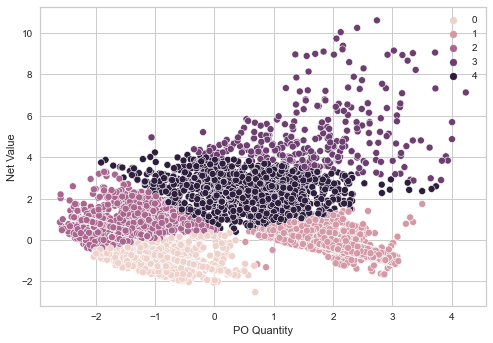

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=sdf, x="PO Quantity", y="Net Value", hue=kmeans.labels_)
plt.show()

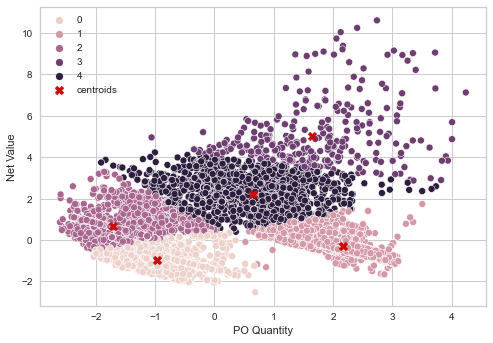

In [117]:
sns.scatterplot(data=sdf, x="PO Quantity", y="Net Value", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

## This is a KMeans cluster for variables PO Quantity and Net Value. 

### Cluster 3 is a cluster having high PO Quantity and High Net Value. This means that Cluster 3 contains products that the company spends a significant amount of money on as well as purchases in large quantities.

### Cluster 4 is a cluster having a moderate amount of money and purchases a moderate quantity of products.

### Cluster 0 is a cluster where the company spends the least amount of money and purchases products in smaller quantities.

In [118]:
#X_principal['Cluster'] = pd.DataFrame(kmeans_clusters, columns=['cluster'] )
#print('Number of data points in each cluster= \n', X_principal['Cluster'].value_counts())

In [119]:
# Executed Agglomerative clustering, however, could not complete execution owing to resource constraints both on 
# local Jupyter Notebook as well as Google Colab using sample datasets as well

#agglo_model = AgglomerativeClustering(linkage="ward",n_clusters=5)
#agglomerative_clusters = agglo_model.fit_predict(df5)

In [120]:
GaussianMixture_model = GaussianMixture(n_components=4)
gmm_clusters = GaussianMixture_model.fit_predict(sdf)

In [121]:
# Executed DBSCAN, however, could not complete execution owing to resource constraints both on 
# local Jupyter Notebook as well as Google Colab using sample datasets as well

#model_dbscan = DBSCAN(eps=3, min_samples=17)
#dbscan_clusters = model_dbscan.fit_predict(df5)

##### The silhouette method is also a method to find the optimal number of clusters and interpretation and validation of consistency within clusters of data. The silhouette method computes silhouette coefficients of each point that measure how much a point is similar to its own cluster compared to other clusters. by providing a concise graphical representation of how well each object has been classified.

In [122]:
def silhouette_method(df,algo,y_pred):
    print('=================================================================================')
    print('Clustering ',algo," : silhouette score : ",silhouette_score(df,y_pred) )


silhouette_method(sdf,' : KMeans',pred_y)

silhouette_method(sdf,' : GaussianMixture',gmm_clusters)
print('=================================================================================')

Clustering   : KMeans  : silhouette score :  0.3627574218199271
Clustering   : GaussianMixture  : silhouette score :  0.3357274267444269
